<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%203%3A%20Prediction%20Modelling/3_7_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Modelling: Machine Learning**
## Ensemble Methods

[Dataset](https://www.kaggle.com/markxie/hra-data): from Kaggle

In this case study, employee satisfaction is estimated for Company X. The company aims to increase employee satisfaction by enabling the development of various human resources policies and the pre-planning of new hires to retain employees. For this, a data set containing various information about company employees is taken into account. The data set, which includes 14999 employees, includes variables such as average monthly working hours, annual time spent in the company, salary level, number of projects and satisfaction level.

In [ ]:
#import libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score,precision_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

### **Data Preparation**

In [ ]:
#Import Data
url="https://drive.google.com/file/d/1JGkwbAU4rY3IWYQaeswBbRMxTKhvhCCf/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#see data size

data.shape

(14999, 10)

In [ ]:
#learn data types

data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [ ]:
#null data check 

data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
#transform the categorical variables

data_new = pd.get_dummies(data, drop_first=True)
data_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
#see new data size
data_new.shape

(14999, 19)

In [ ]:
#learn new data types
data_new.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales_RandD                uint8
sales_accounting           uint8
sales_hr                   uint8
sales_management           uint8
sales_marketing            uint8
sales_product_mng          uint8
sales_sales                uint8
sales_support              uint8
sales_technical            uint8
salary_low                 uint8
salary_medium              uint8
dtype: object

In [ ]:
#find out the number of values in the target variable
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
#dependent and independent variable distinction
X = data_new.drop("left", axis = 1)
y = data_new["left"]

In [ ]:
#scale the dataset with the standard scaler

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

std_mdl = StandardScaler().fit(X_train)
X_train = std_mdl.transform(X_train)
X_test = std_mdl.transform(X_test)

### **Building the Models** 

Company X's employee satisfaction will be modeled using 5 different classification methods, including Bagging classifier algorithm, Random Forest classifier algorithm, Gradient Boosting classifier algorithm, XGBoost classifier algorithm and AdaBoost classifier algorithm.

### **Bagging Classifier Algorithm**

In [ ]:
#fit the model

mdl1=BaggingClassifier(n_estimators=100, max_samples=0.1)
mdl1.fit(X_train,y_train)

BaggingClassifier(max_samples=0.1, n_estimators=100)

In [ ]:
#calculate accuracy scores of model training and test data
ypred_train1 = mdl1.predict(X_train)
ypred_test1 = mdl1.predict(X_test)

bagging_training_accuracy=accuracy_score(y_train,ypred_train1)
print(bagging_training_accuracy)

bagging_testing_accuracy=accuracy_score(y_test,ypred_test1)
print(bagging_testing_accuracy)

0.9797123535574817
0.9731111111111111


In [ ]:
#calculate the performance measurement
print(confusion_matrix(y_test,ypred_test1))

bagging_recall=recall_score(y_test,ypred_test1)
print(bagging_recall)

bagging_precision=precision_score(y_test,ypred_test1)
print(bagging_precision)

bagging_f1=f1_score(y_test,ypred_test1)
print(bagging_f1)

[[3410   18]
 [ 103  969]]
0.9039179104477612
0.9817629179331308
0.9412336085478388


In [ ]:
# show the classification report
print(classification_report(y_test,ypred_test1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3428
           1       0.98      0.90      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.98      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [ ]:
# Plot the ROC graph

probs = mdl1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

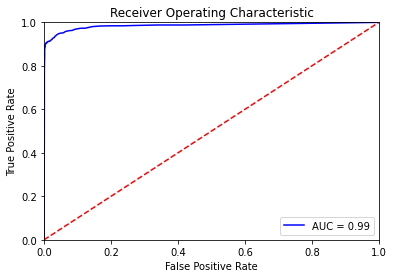

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

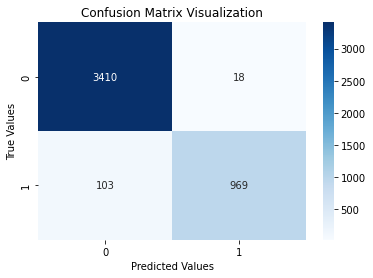

In [ ]:
# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test,ypred_test1), cmap='Blues', annot=True,fmt='d')
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix Visualization")
plt.show()

### **Random Forest Classifier Algorithm**

In [ ]:
#fit the model

mdl2=RandomForestClassifier(n_estimators=100, max_samples=0.1, random_state=42)
mdl2.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.1, random_state=42)

In [ ]:
#calculate accuracy scores of model training and test data
ypred_train2 = mdl2.predict(X_train)
ypred_test2 = mdl2.predict(X_test)

randomforest_training_accuracy=accuracy_score(y_train,ypred_train2)
print(randomforest_training_accuracy)

randomforest_testing_accuracy=accuracy_score(y_test,ypred_test2)
print(randomforest_testing_accuracy)

0.9783788932279265
0.9708888888888889


In [ ]:
#calculate the performance measurement

print(confusion_matrix(y_test,ypred_test2))

randomforest_recall=recall_score(y_test,ypred_test2)
print(randomforest_recall)

randomforest_precision=precision_score(y_test,ypred_test2)
print(randomforest_precision)

randomforest_f1=f1_score(y_test,ypred_test2)
print(randomforest_f1)

[[3409   19]
 [ 112  960]]
0.8955223880597015
0.9805924412665986
0.9361287176986837


In [ ]:
# show the classification report
print(classification_report(y_test,ypred_test2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3428
           1       0.98      0.90      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.94      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [ ]:
# Plot the ROC graph
probs = mdl2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

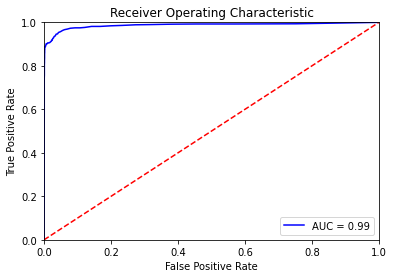

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

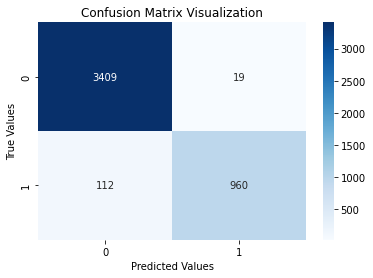

In [ ]:
# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test,ypred_test2), cmap='Blues', annot=True,fmt='d')
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix Visualization")
plt.show()

### **Gradient Boosting Classifier Algorithm**

In [ ]:
#fit the model

mdl3 = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
mdl3.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
#calculate accuracy scores of model training and test data
ypred_train3 = mdl3.predict(X_train)
ypred_test3 = mdl3.predict(X_test)


gradient_training_accuracy=accuracy_score(y_train,ypred_train3)
print(gradient_training_accuracy)

gradient_testing_accuracy=accuracy_score(y_test,ypred_test3)
print(gradient_testing_accuracy)

0.9792361177254977
0.9724444444444444


In [ ]:
#calculate the performance measurement
print(confusion_matrix(y_test,ypred_test3))

gradient_recall=recall_score(y_test,ypred_test3)
print(gradient_recall)

gradient_precision=precision_score(y_test,ypred_test3)
print(gradient_precision)

gradient_f1=f1_score(y_test,ypred_test3)
print(gradient_f1)

[[3388   40]
 [  84  988]]
0.9216417910447762
0.9610894941634242
0.940952380952381


In [ ]:
# show the classification report
print(classification_report(y_test,ypred_test3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.96      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [ ]:
# Plot the ROC graph
probs = mdl3.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

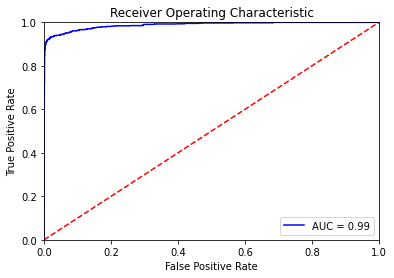

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

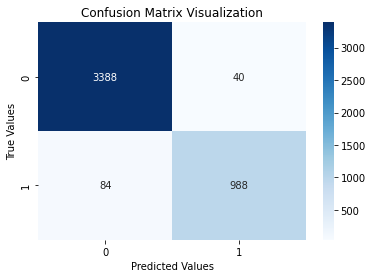

In [ ]:
# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test,ypred_test3), cmap='Blues', annot=True,fmt='d')
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix Visualization")
plt.show()

### **XGBoost Classifier Algorithm**

In [ ]:
#fit the model

mdl4= XGBClassifier(learning_rate=0.1,n_estimators=100)
mdl4.fit(X_train, y_train)

XGBClassifier()

In [ ]:
#calculate accuracy scores of model training and test data
ypred_train4 = mdl4.predict(X_train)
ypred_test4 = mdl4.predict(X_test)

xgboost_training_accuracy=accuracy_score(y_train,ypred_train4)
print(xgboost_training_accuracy)

xgboost_testing_accuracy=accuracy_score(y_test,ypred_test4)
print(xgboost_testing_accuracy)

0.9782836460615296
0.97


In [ ]:
#calculate the performance measurement

print(confusion_matrix(y_test,ypred_test4))

xgboost_recall=recall_score(y_test,ypred_test4)
print(xgboost_recall)

xgboost_precision=precision_score(y_test,ypred_test4)
print(xgboost_precision)

xgboost_f1=f1_score(y_test,ypred_test4)
print(xgboost_f1)

[[3388   40]
 [  95  977]]
0.9113805970149254
0.960668633235005
0.935375777884155


In [ ]:
# show the classification report
print(classification_report(y_test,ypred_test4))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3428
           1       0.96      0.91      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [ ]:
# Plot the ROC graph
probs = mdl4.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

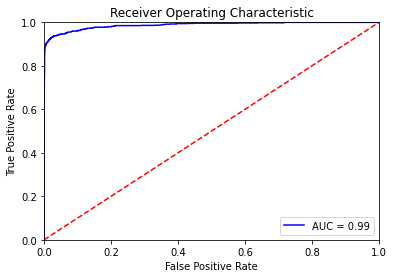

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

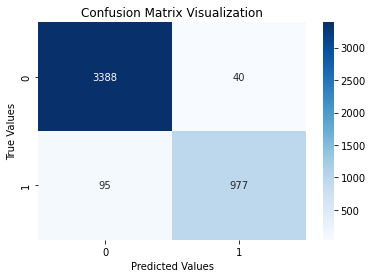

In [ ]:
# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test,ypred_test4), cmap='Blues', annot=True,fmt='d')
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix Visualization")
plt.show()

### **AdaBoost Classifier Algorithm** 

In [ ]:
#fit the model

mdl5= AdaBoostClassifier(learning_rate=0.1,n_estimators=100)
mdl5.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [ ]:
#calculate accuracy scores of model training and test data
ypred_train5 = mdl5.predict(X_train)
ypred_test5 = mdl5.predict(X_test)

adaboost_training_accuracy=accuracy_score(y_train,ypred_train5)
print(adaboost_training_accuracy)

adaboost_testing_accuracy=accuracy_score(y_test,ypred_test5)
print(adaboost_testing_accuracy)

0.9149442804076579
0.9131111111111111


In [ ]:
#calculate the performance measurement

print(confusion_matrix(y_test,ypred_test5))

adaboost_recall=recall_score(y_test,ypred_test5)
print(adaboost_recall)

adaboost_precision=precision_score(y_test,ypred_test5)
print(adaboost_precision)

adaboost_f1=f1_score(y_test,ypred_test5)
print(adaboost_f1)

[[3363   65]
 [ 326  746]]
0.6958955223880597
0.9198520345252774
0.7923526287838556


In [ ]:
# show the classification report
print(classification_report(y_test,ypred_test5))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3428
           1       0.92      0.70      0.79      1072

    accuracy                           0.91      4500
   macro avg       0.92      0.84      0.87      4500
weighted avg       0.91      0.91      0.91      4500



In [ ]:
# Plot the ROC graph
probs = mdl5.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

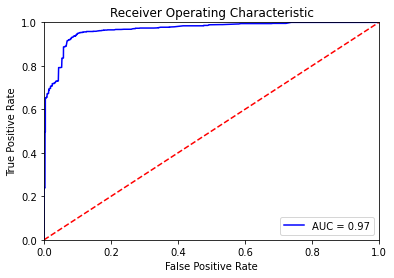

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

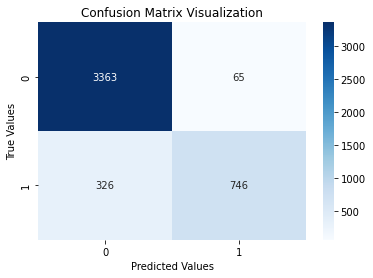

In [ ]:
# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test,ypred_test5), cmap='Blues', annot=True,fmt='d')
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix Visualization")
plt.show()

### **Results**

The results from the table below can be summarized as follows. 

By using ensemble methods, it is seen that the method that best predicts Company X's employee satisfaction belongs to the Bagging classifier. Bagging method has the best classification accuracy and the largest AUC among the models. Besides, it is seen with the high values of the performance evaluation criteria and the AUC value that other ensemble methods give similar results with the Bagging method.

In [ ]:
!pip install texttable
from texttable import Texttable
t = Texttable()
t.add_rows([['Model', 'Training Accuracy', 'Testing Accuracy', 'Test Precision', 'Test Recall', 'Test F1'], ['Bagging Method', bagging_training_accuracy, bagging_testing_accuracy, bagging_precision, bagging_recall, bagging_f1], ['Random Forest Method', randomforest_training_accuracy , randomforest_testing_accuracy , randomforest_precision,randomforest_recall, randomforest_f1], ['Gradient Boosting', gradient_training_accuracy,gradient_testing_accuracy,gradient_precision,gradient_recall,gradient_f1], ['XGBoost Method', xgboost_training_accuracy,xgboost_testing_accuracy,xgboost_precision, xgboost_recall, xgboost_f1],['AdaBoost Method', adaboost_training_accuracy,adaboost_testing_accuracy,adaboost_precision, adaboost_recall, adaboost_f1]])
print(t.draw())

+-------------+-------------+-------------+-------------+------------+---------+
|    Model    |  Training   |   Testing   |    Test     |    Test    | Test F1 |
|             |  Accuracy   |  Accuracy   |  Precision  |   Recall   |         |
+=============+=============+=============+=============+============+=========+
| Bagging     | 0.980       | 0.973       | 0.982       | 0.904      | 0.941   |
| Method      |             |             |             |            |         |
+-------------+-------------+-------------+-------------+------------+---------+
| Random      | 0.978       | 0.971       | 0.981       | 0.896      | 0.936   |
| Forest      |             |             |             |            |         |
| Method      |             |             |             |            |         |
+-------------+-------------+-------------+-------------+------------+---------+
| Gradient    | 0.979       | 0.972       | 0.961       | 0.922      | 0.941   |
| Boosting    |             